<a href="https://colab.research.google.com/github/Abdul-Subhan24/Coffee_Sales_Analysis/blob/main/Project_on_coffee_sales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Importing necessary libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor

**1. Data Loading**

In [2]:
df = pd.read_csv('coffee_sales.csv')
print("Data Loaded Successfully!")
df.head()

Data Loaded Successfully!


,date,datetime,cash_type,card,money,coffee_name
0,2024-03-01,2024-03-01 10:15:50.520,card,ANON-0000-0000-0001,38.7,Latte
1,2024-03-01,2024-03-01 12:19:22.539,card,ANON-0000-0000-0002,38.7,Hot Chocolate
2,2024-03-01,2024-03-01 12:20:18.089,card,ANON-0000-0000-0002,38.7,Hot Chocolate
3,2024-03-01,2024-03-01 13:46:33.006,card,ANON-0000-0000-0003,28.9,Americano
4,2024-03-01,2024-03-01 13:48:14.626,card,ANON-0000-0000-0004,38.7,Latte


**2. Data Preprocessing**

In [3]:
# Checking unique cash types
print("Unique cash types:", df["cash_type"].unique())

Unique cash types: ['card' 'cash']


In [4]:
# Dropping unnecessary columns
df.drop(['card'], axis=1, inplace=True)

In [5]:
# Checking for missing values and duplicates
print("Missing values:", df.isnull().sum())
df.drop_duplicates(inplace=True)

Missing values: date           0
datetime       0
cash_type      0
money          0
coffee_name    0
dtype: int64


In [6]:
# Converting 'date' and 'datetime' columns to datetime type
df['datetime'] = pd.to_datetime(df['datetime'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1133 entries, 0 to 1132
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date         1133 non-null   object        
 1   datetime     1133 non-null   datetime64[ns]
 2   cash_type    1133 non-null   object        
 3   money        1133 non-null   float64       
 4   coffee_name  1133 non-null   object        
dtypes: datetime64[ns](1), float64(1), object(3)
memory usage: 44.4+ KB


In [7]:
# Dropping the 'date' column as it is no longer needed
df.drop('date', axis=1, inplace=True)

**3. Feature Engineering**

In [8]:
df['hour'] = df['datetime'].dt.hour
df['day'] = df['datetime'].dt.day
df['month'] = df['datetime'].dt.month
df['weekday'] = df['datetime'].dt.weekday
df['Year'] = df['datetime'].dt.year
df.head()

,datetime,cash_type,money,coffee_name,hour,day,month,weekday,Year
0,2024-03-01 10:15:50.520,card,38.7,Latte,10,1,3,4,2024
1,2024-03-01 12:19:22.539,card,38.7,Hot Chocolate,12,1,3,4,2024
2,2024-03-01 12:20:18.089,card,38.7,Hot Chocolate,12,1,3,4,2024
3,2024-03-01 13:46:33.006,card,28.9,Americano,13,1,3,4,2024
4,2024-03-01 13:48:14.626,card,38.7,Latte,13,1,3,4,2024


**4. Exploratory Data Analysis (EDA)**

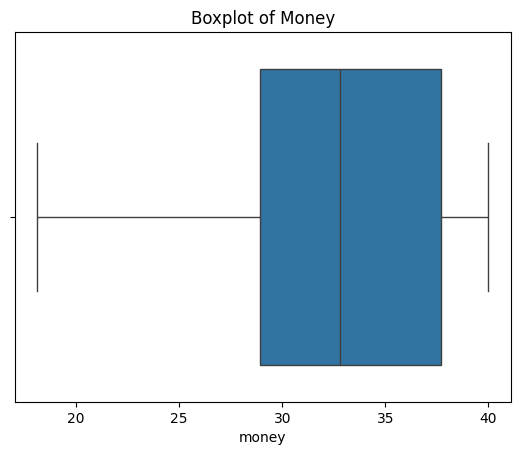

In [9]:
# Boxplot for outlier detection
sns.boxplot(x=df['money'])
plt.title('Boxplot of Money')
plt.show()

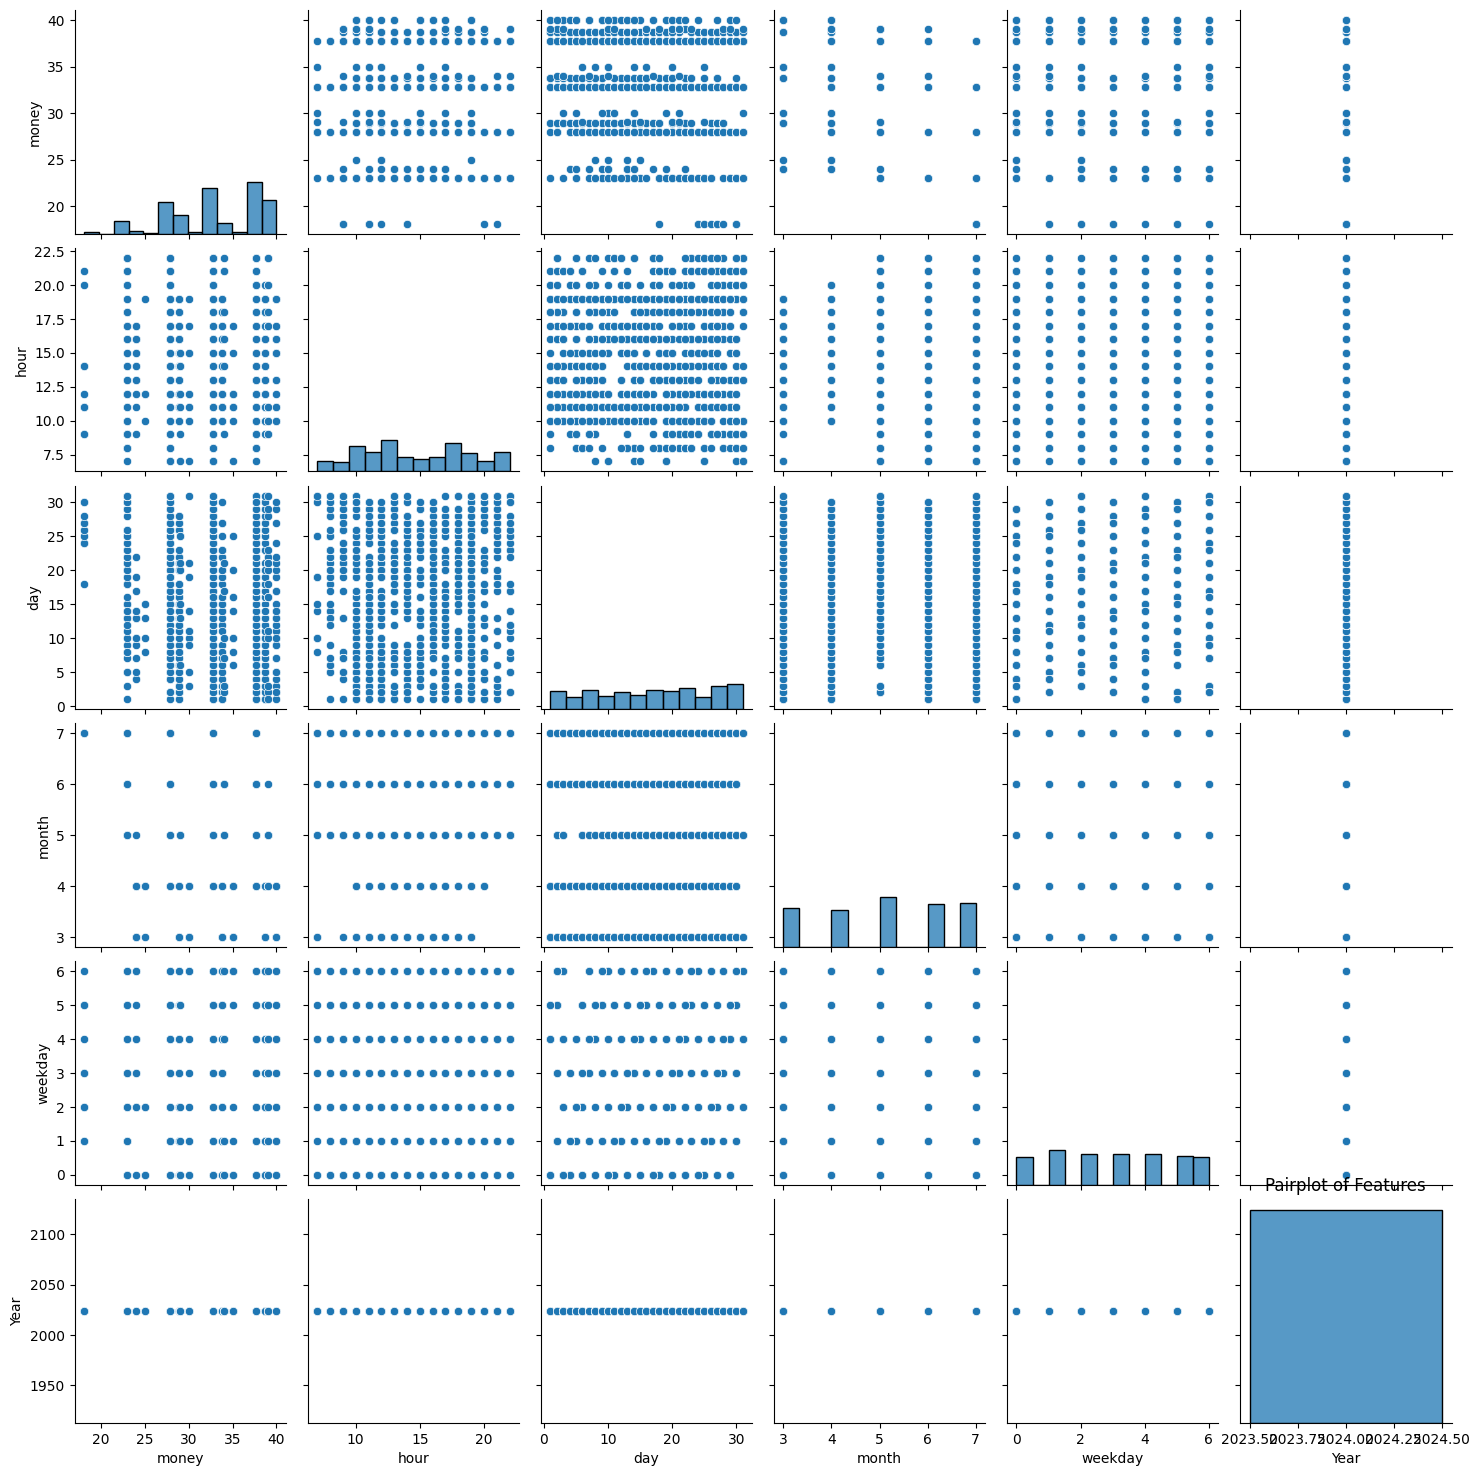

In [10]:
# Pairplot to see relationships between variables
sns.pairplot(df)
plt.title('Pairplot of Features')
plt.show()

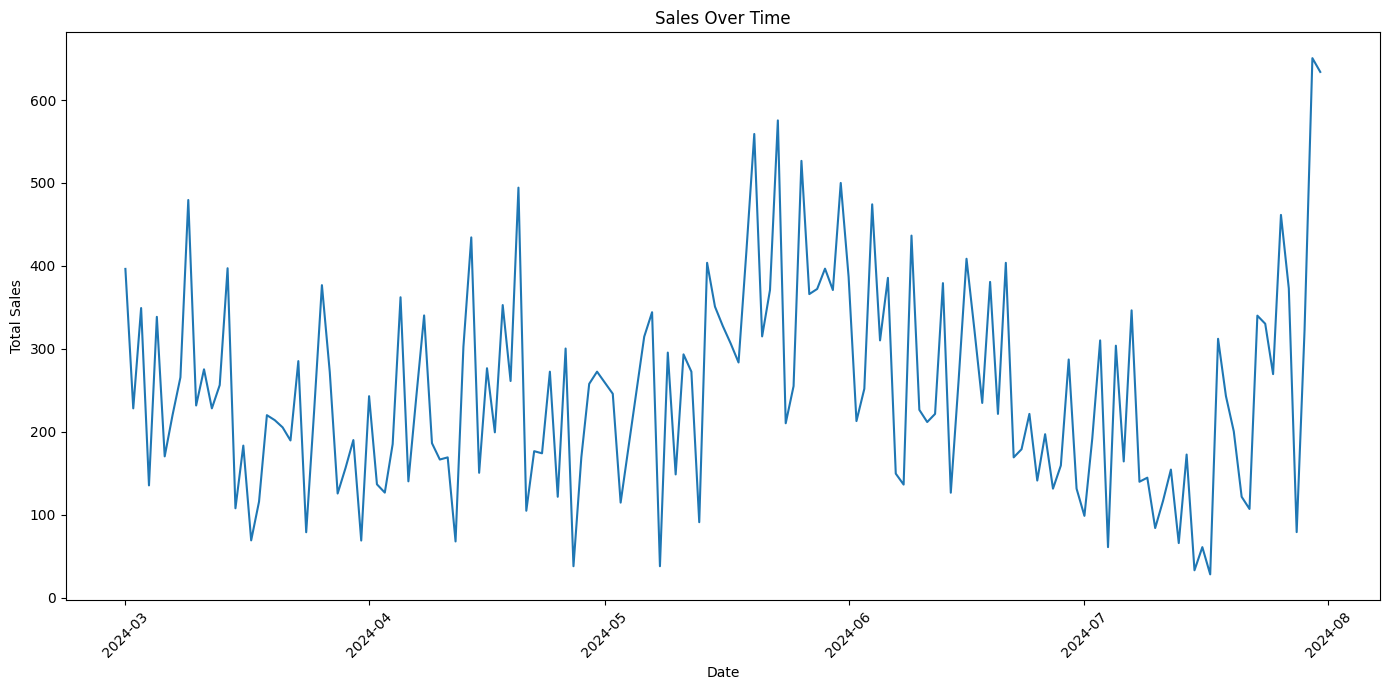

In [11]:
# Sales Over Time
daily_sales = df.groupby(df['datetime'].dt.date)['money'].sum().reset_index()
daily_sales.columns = ['Date', 'Total Sales']
plt.figure(figsize=(14, 7))
sns.lineplot(data=daily_sales, x='Date', y='Total Sales')
plt.title('Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

<ipython-input-12-4ae3b3790eb4>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=store_sales, x='Store', y='Total Sales', palette="viridis")


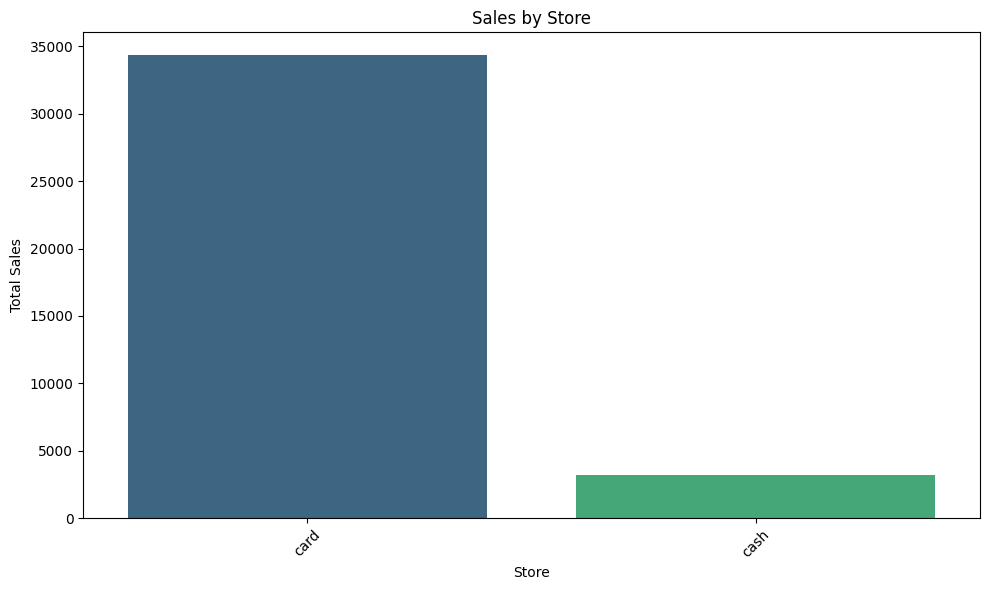

In [12]:
# Sales by Store (cash_type)
store_sales = df.groupby('cash_type')['money'].sum().reset_index()
store_sales.columns = ['Store', 'Total Sales']
plt.figure(figsize=(10, 6))
sns.barplot(data=store_sales, x='Store', y='Total Sales', palette="viridis")
plt.title('Sales by Store')
plt.xlabel('Store')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

<ipython-input-13-70d950b7065f>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=product_sales, x='Product', y='Total Sales', palette="magma")


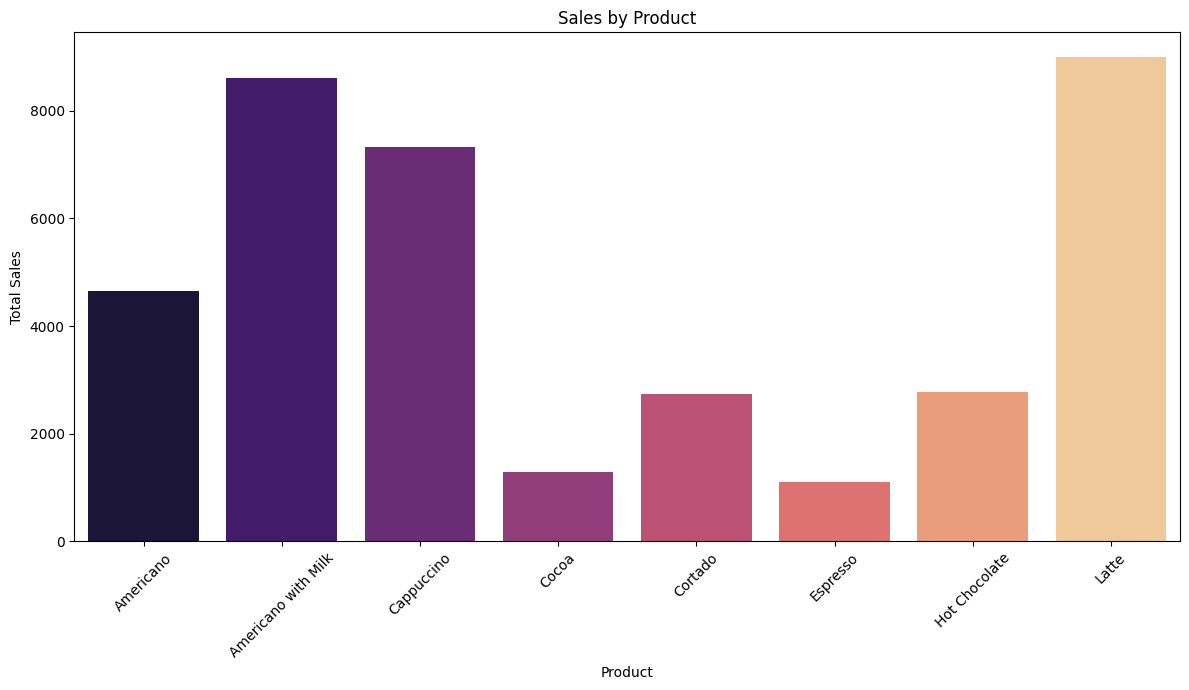

In [13]:
# Sales by Coffee Type
product_sales = df.groupby('coffee_name')['money'].sum().reset_index()
product_sales.columns = ['Product', 'Total Sales']
plt.figure(figsize=(12, 7))
sns.barplot(data=product_sales, x='Product', y='Total Sales', palette="magma")
plt.title('Sales by Product')
plt.xlabel('Product')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**5. Data Encoding**

In [14]:
# Encoding categorical variables
df['cash_type'].replace(to_replace={'card': 1, 'cash': 0}, inplace=True)
df = pd.get_dummies(df, columns=['coffee_name', 'cash_type'], drop_first=True)

<ipython-input-14-d35a7481e528>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['cash_type'].replace(to_replace={'card': 1, 'cash': 0}, inplace=True)
<ipython-input-14-d35a7481e528>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['cash_type'].replace(to_replace={'card': 1, 'cash': 0}, inplac

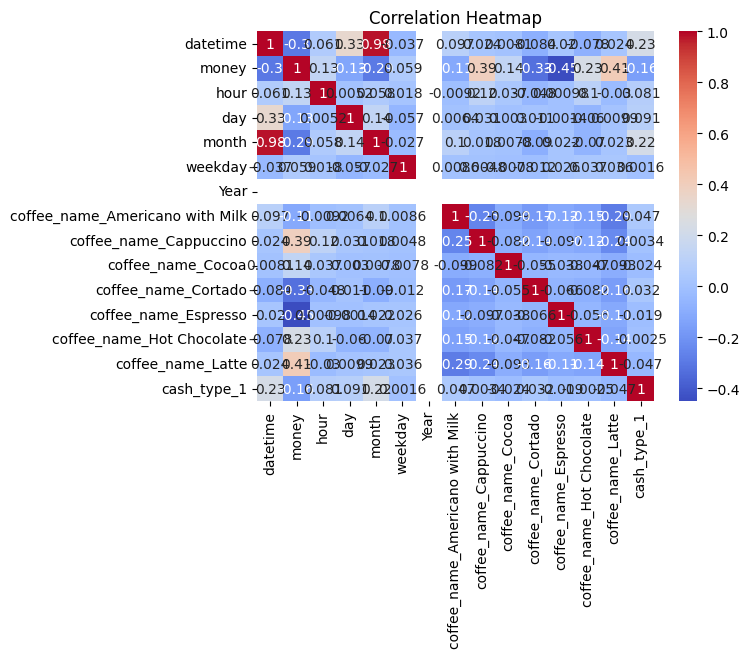

In [15]:
# Correlation heatmap
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

**6. Machine Learning Modeling**

In [16]:
# Defining features and target variable
X = df[['cash_type_1', 'hour', 'day', 'month', 'weekday'] + [col for col in df.columns if 'coffee_name_' in col]]
y = df['money']

In [17]:
# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# **================================**
# **Model Comparison and Evaluation**
# **================================**
**This section implements a variety of regression models to evaluate their
Performance on the coffee sales dataset. By running several algorithms,
We can compare their Mean Squared Error and R-squared scores to identify
The model that best predicts our target variable, 'money'.**

In [18]:
# Initialize each model
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(random_state=42),
    'Decision Tree': DecisionTreeRegressor(random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(random_state=42),
    'Support Vector Regressor': SVR(),
    'K-Neighbors Regressor': KNeighborsRegressor(),
    'XGBoost Regressor': XGBRegressor(random_state=42),
    'Lasso Regression': Lasso()
}

# Create a dictionary to store the results
results = {}

# Loop through each model, train, and evaluate
for model_name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = model.predict(X_test)

    # Calculate Mean Squared Error and R-squared
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    # Store the results
    results[model_name] = {
        'Mean Squared Error': mse,
        'R-squared': r2
    }

    # Print the results for each model
    print(f'{model_name} Results:')
    print(f'   Mean Squared Error: {mse}')
    print(f'   R-squared: {r2}\n')

# Display all results
results_df = pd.DataFrame(results).T
results_df.sort_values(by='R-squared', ascending=False, inplace=True)
print("Summary of all models' performances:")
print(results_df)


Linear Regression Results:
   Mean Squared Error: 1.424478262126508
   R-squared: 0.9234829112795266

Random Forest Results:
   Mean Squared Error: 0.052173769058688105
   R-squared: 0.997197440619427

Decision Tree Results:
   Mean Squared Error: 0.025733920704845828
   R-squared: 0.9986176800685194

Gradient Boosting Results:
   Mean Squared Error: 0.21030749093211615
   R-squared: 0.9887031502199198

Support Vector Regressor Results:
   Mean Squared Error: 16.33440737531291
   R-squared: 0.12258310178258691

K-Neighbors Regressor Results:
   Mean Squared Error: 20.02598449339207
   R-squared: -0.07571317368380992

XGBoost Regressor Results:
   Mean Squared Error: 0.07942148052926458
   R-squared: 0.9957338061004195

Lasso Regression Results:
   Mean Squared Error: 18.51358121601254
   R-squared: 0.005526883699464302

Summary of all models' performances:
                          Mean Squared Error  R-squared
Decision Tree                       0.025734   0.998618
Random Forest      

**7. Hyperparameter Tuning**

In [19]:
# Initialize Random Forest for Hyperparameter Tuning
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Perform Grid Search
rf = RandomForestRegressor(random_state=42)
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 108 candidates, totalling 540 fits


GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [10, 20, 30, None],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             verbose=2)

In [20]:
# Use the best model found by Grid Search
best_rf = grid_search.best_estimator_

# Evaluate model performance
y_pred = best_rf.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Hyperparameter Tuned Model Performance:")
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')
print(f'Best Parameters: {grid_search.best_params_}')

Hyperparameter Tuned Model Performance:
Mean Squared Error: 0.052173769058688105
R-squared: 0.997197440619427
Best Parameters: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}


**================================**
**Additional Models and Comparisons**
**================================**

In [21]:
# Define additional models
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(random_state=42),
    'Support Vector Regressor': SVR(),
    'K-Neighbors Regressor': KNeighborsRegressor(),
    'XGBoost Regressor': XGBRegressor(random_state=42),
    'Lasso Regression': Lasso()
}

In [22]:
# Dictionary to store evaluation metrics
results = {}

for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    results[model_name] = {'Mean Squared Error': mse, 'R-squared': r2}
    print(f'{model_name} - MSE: {mse}, R2: {r2}')

Linear Regression - MSE: 1.424478262126508, R2: 0.9234829112795266
Decision Tree - MSE: 0.025733920704845828, R2: 0.9986176800685194
Gradient Boosting - MSE: 0.21030749093211615, R2: 0.9887031502199198
Support Vector Regressor - MSE: 16.33440737531291, R2: 0.12258310178258691
K-Neighbors Regressor - MSE: 20.02598449339207, R2: -0.07571317368380992
XGBoost Regressor - MSE: 0.07942148052926458, R2: 0.9957338061004195
Lasso Regression - MSE: 18.51358121601254, R2: 0.005526883699464302


In [23]:
# Display a summary of model performances
results_df = pd.DataFrame(results).T
results_df.sort_values(by='R-squared', ascending=False, inplace=True)
print("Model Comparison Summary:")
print(results_df)

Model Comparison Summary:
                          Mean Squared Error  R-squared
Decision Tree                       0.025734   0.998618
XGBoost Regressor                   0.079421   0.995734
Gradient Boosting                   0.210307   0.988703
Linear Regression                   1.424478   0.923483
Support Vector Regressor           16.334407   0.122583
Lasso Regression                   18.513581   0.005527
K-Neighbors Regressor              20.025984  -0.075713


**8. Feature Importance**

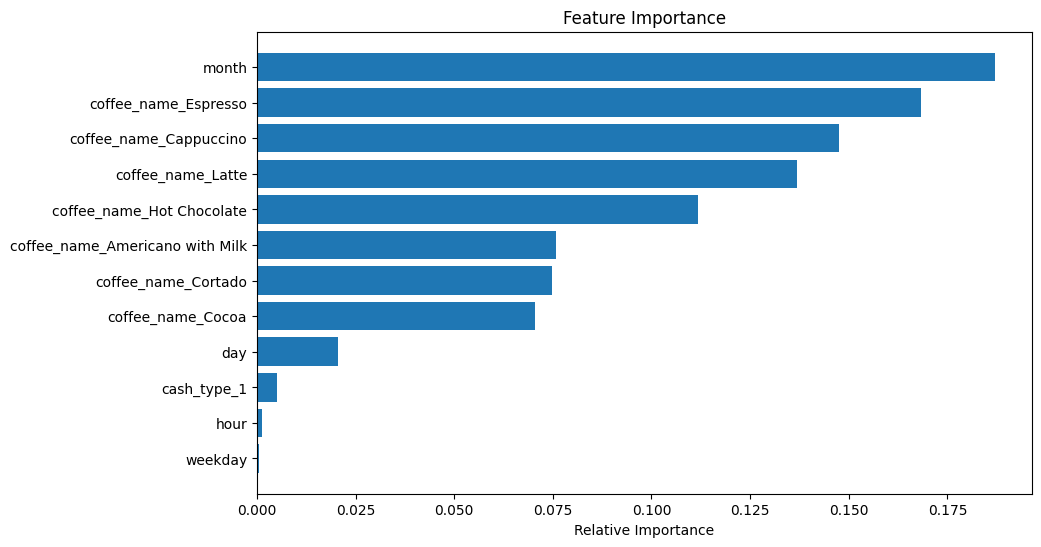

In [24]:
importances = best_rf.feature_importances_
indices = np.argsort(importances)
plt.figure(figsize=(10, 6))
plt.title("Feature Importance")
plt.barh(range(len(indices)), importances[indices], align="center")
plt.yticks(range(len(indices)), [X.columns[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

**9. Model Validation with Cross-Validation**

In [25]:
scores = cross_val_score(best_rf, X, y, cv=5, scoring='r2')
print(f'Cross-Validation R2 Scores: {scores}')
print(f'Mean R2 Score: {scores.mean()}')

Cross-Validation R2 Scores: [0.99044768 0.98719237 0.99636227 0.99982428 0.00202954]
Mean R2 Score: 0.7951712272926189


**10. Additional Visualizations**

<Axes: title={'center': 'Sales Trend Over Time'}, xlabel='Date', ylabel='Number of Sales'>

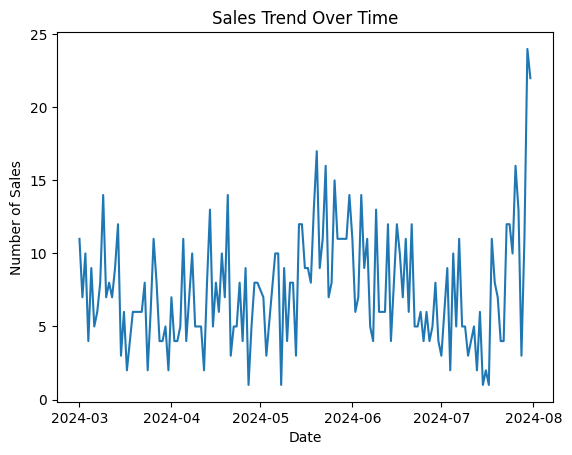

In [26]:
# Sales trend over time
df.groupby(df['datetime'].dt.date).size().plot(kind='line', title='Sales Trend Over Time', xlabel='Date', ylabel='Number of Sales')

<Axes: title={'center': 'Average Sales by Weekday'}, xlabel='Weekday (0=Monday, 6=Sunday)', ylabel='Average Money Spent'>

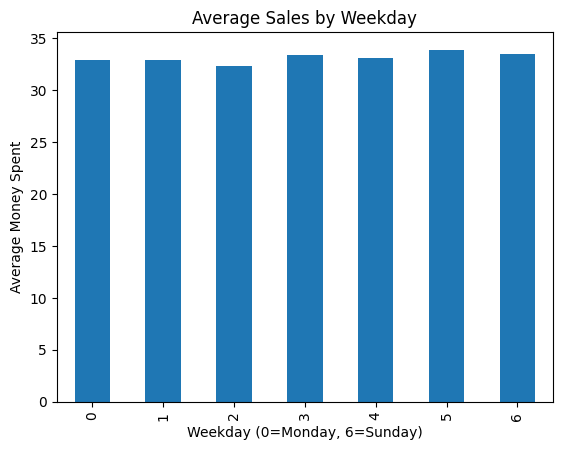

In [27]:
# Average sales by weekday
df.groupby('weekday')['money'].mean().plot(kind='bar', title='Average Sales by Weekday', xlabel='Weekday (0=Monday, 6=Sunday)', ylabel='Average Money Spent')


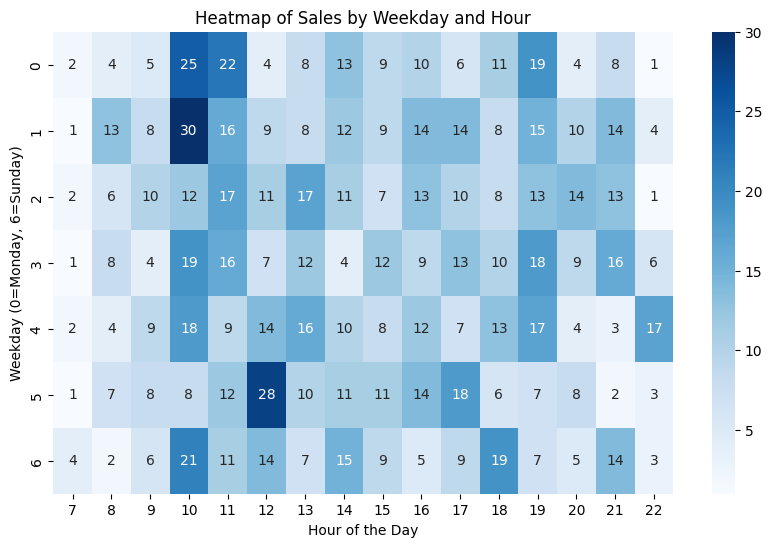

In [28]:
# Heatmap of Sales by Weekday and Hour
heatmap_data = df.groupby(['weekday', 'hour']).size().unstack()
plt.figure(figsize=(10,6))
sns.heatmap(heatmap_data, cmap='Blues', annot=True)
plt.title('Heatmap of Sales by Weekday and Hour')
plt.xlabel('Hour of the Day')
plt.ylabel('Weekday (0=Monday, 6=Sunday)')
plt.show()

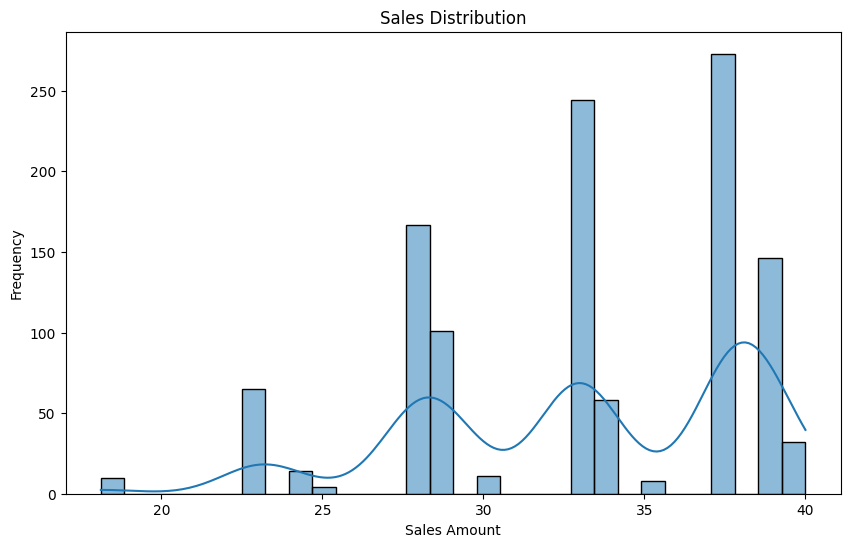

In [29]:
# Sales Distribution Histogram
plt.figure(figsize=(10, 6))
sns.histplot(df['money'], bins=30, kde=True)
plt.title('Sales Distribution')
plt.xlabel('Sales Amount')
plt.ylabel('Frequency')
plt.show()


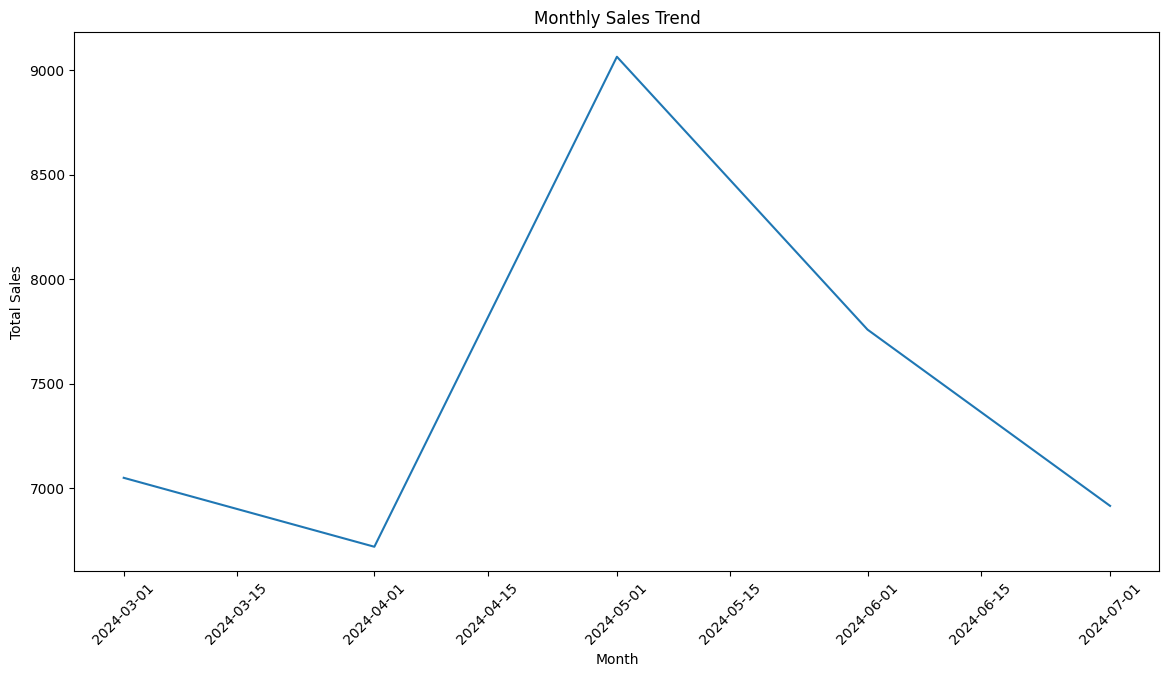

In [30]:
# Monthly Sales Trend
monthly_sales = df.groupby(df['datetime'].dt.to_period('M'))['money'].sum().reset_index()
monthly_sales['datetime'] = monthly_sales['datetime'].dt.to_timestamp()

plt.figure(figsize=(14, 7))
sns.lineplot(data=monthly_sales, x='datetime', y='money')
plt.title('Monthly Sales Trend')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.show()


<ipython-input-31-ced1c6876603>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=monthly_sales, x='datetime', y='money', palette='Blues')


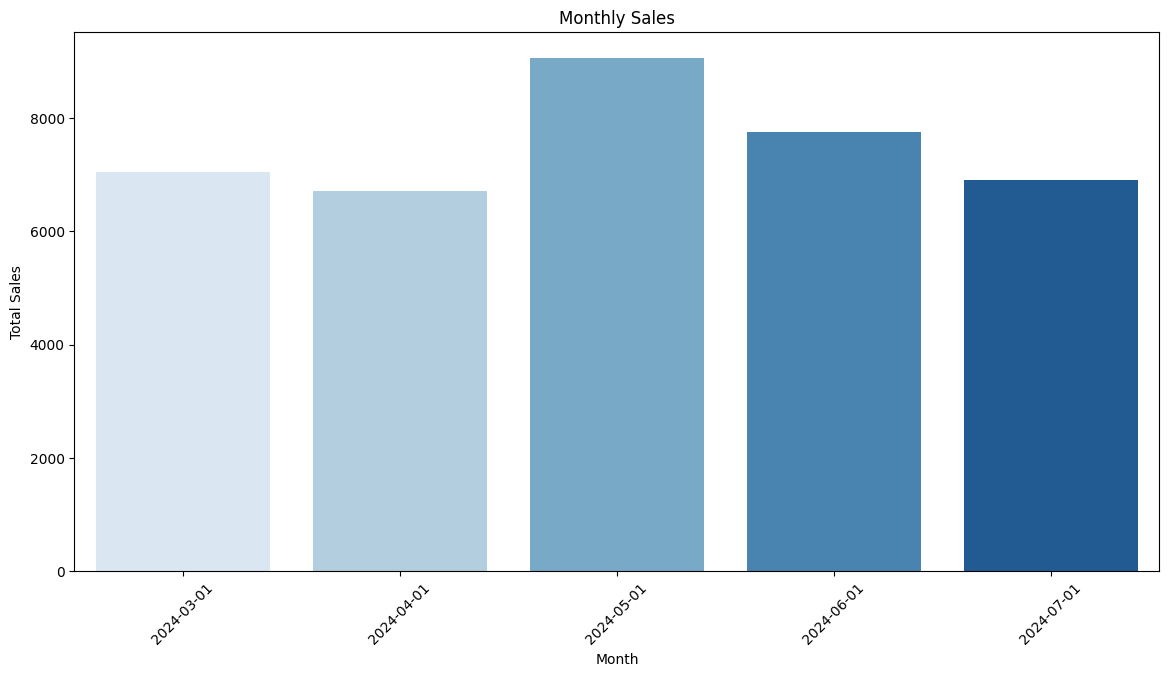

In [31]:
# Sales by Month
monthly_sales = df.groupby(df['datetime'].dt.to_period('M'))['money'].sum().reset_index()
monthly_sales['datetime'] = monthly_sales['datetime'].dt.to_timestamp()

plt.figure(figsize=(14, 7))
sns.barplot(data=monthly_sales, x='datetime', y='money', palette='Blues')
plt.title('Monthly Sales')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.show()


<ipython-input-32-6078db158532>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=weekday_sales, x='weekday', y='money', palette='magma')


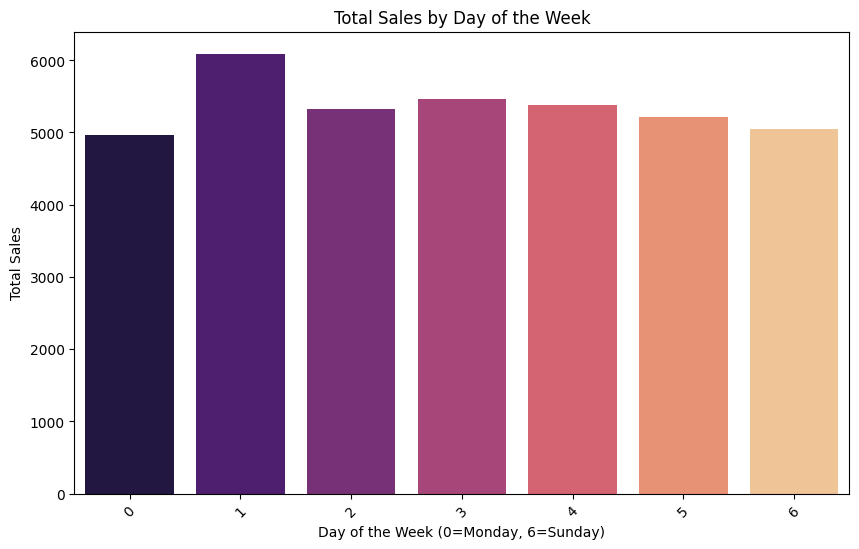

In [32]:
# Sales by Day of the Week
weekday_sales = df.groupby('weekday')['money'].sum().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(data=weekday_sales, x='weekday', y='money', palette='magma')
plt.title('Total Sales by Day of the Week')
plt.xlabel('Day of the Week (0=Monday, 6=Sunday)')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.show()


<ipython-input-33-393a2557fbd9>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=cash_sales, x='cash_type_1', y='money', palette='viridis')


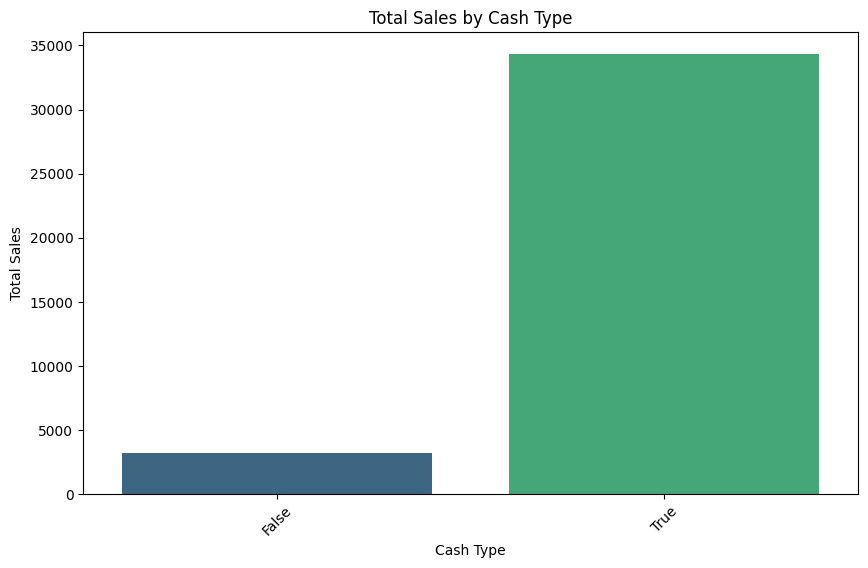

In [33]:
# Sales Comparison by Cash Type
cash_sales = df.groupby('cash_type_1')['money'].sum().reset_index()
plt.figure(figsize=(10, 6))
sns.barplot(data=cash_sales, x='cash_type_1', y='money', palette='viridis')
plt.title('Total Sales by Cash Type')
plt.xlabel('Cash Type')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.show()
